In [59]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("../data/data.csv")
df.head()

,ID,Text,Kategorie,Automatisch-ermittelte-Adresse,Gruppe,lon,lat,Jahr,Monat,Gemeldet-am,Freigegeben-am,Geprueft-am,Freigabe-in,Stadtteil
0,2972,Schleyerweg Lampe Nr. 7 defekt,Beleuchtung > Straßenlaternen defekt,"Schleyerweg 6, 78467 Konstanz, Germany",Stadtwerke Konstanz\n,9.162128,47.684125,2020,1,2020-01-01 17:06:00,2020-01-02 06:52:00,2020-01-02 06:52:00,0.6,NaN
1,2973,Zwei Schlaglöcher die immer größer werden. Bez...,"Straßen, Fahrrad & Verkehr > Straßenschäden","Seehang 6, 78465 Konstanz, Germany",Ortsverwaltung Dettingen-Wallhausen,9.129630,47.747843,2020,1,2020-01-01 18:01:00,2020-01-02 06:53:00,2020-01-02 06:53:00,0.5,NaN
2,2974,An dem Jungbaum gegenüber Flurweg 5a wurde mit...,Hinweise > Hinweise,"Flurweg 3, 78464 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.192643,47.692277,2020,1,2020-01-02 16:22:00,2020-01-03 06:44:00,2020-01-03 06:44:00,0.6,Egg
3,2975,Die Platte der Stufe ist locker und wackelt. I...,"Straßen, Fahrrad & Verkehr > Fußwege schadhaft","Gottlieber Str. 56A, 78462 Konstanz, Germany",Technische Betriebe Konstanz\r\n\r\n,9.161881,47.663024,2020,1,2020-01-03 10:50:00,2020-01-06 07:58:00,2020-01-06 07:58:00,2.9,NaN
4,2976,Die Platte der Stufe ist locker und wackelt. I...,"Straßen, Fahrrad & Verkehr > Fußwege schadhaft","Gottlieber Str. 56A, 78462 Konstanz, Germany",Moderation,9.161881,47.663024,2020,1,2020-01-03 10:50:00,NaN,NaN,NaN,NaN


In [35]:
df['Geprueft-am'] =  pd.to_datetime(df['Geprueft-am'])
df['Gemeldet-am'] =  pd.to_datetime(df['Gemeldet-am'])

## Counting deficiencies in the districts

In [36]:
df.Stadtteil.value_counts()

Petershausen-West    275
Keine Angabe         250
Petershausen-Ost     146
Wollmatingen         122
Altstadt             101
Allmannsdorf          85
Paradies              84
Fürstenberg           79
Königsbau             61
Litzelstetten         58
Industriegebiet       47
Staad                 46
Dettingen             39
Egg                   22
Dingelsdorf           18
Wallhausen             2
Name: Stadtteil, dtype: int64

As you can see, most of the rows don't were not assigned a district. However, we could assign a district with the help of the coordinates ("lon" and "lat").

In [37]:
def calc_timespan(gemeldet, geprueft):
    delta = geprueft - gemeldet
    return delta

df["timespan_checked"] = df.apply(lambda x: calc_timespan(x["Gemeldet-am"], x["Geprueft-am"]), axis=1)
df.head()

,ID,Text,Kategorie,Automatisch-ermittelte-Adresse,Gruppe,lon,lat,Jahr,Monat,Gemeldet-am,Freigegeben-am,Geprueft-am,Freigabe-in,Stadtteil,timespan_checked
0,2972,Schleyerweg Lampe Nr. 7 defekt,Beleuchtung > Straßenlaternen defekt,"Schleyerweg 6, 78467 Konstanz, Germany",Stadtwerke Konstanz\n,9.162128,47.684125,2020,1,2020-01-01 17:06:00,2020-01-02 06:52:00,2020-01-02 06:52:00,0.6,NaN,0 days 13:46:00
1,2973,Zwei Schlaglöcher die immer größer werden. Bez...,"Straßen, Fahrrad & Verkehr > Straßenschäden","Seehang 6, 78465 Konstanz, Germany",Ortsverwaltung Dettingen-Wallhausen,9.129630,47.747843,2020,1,2020-01-01 18:01:00,2020-01-02 06:53:00,2020-01-02 06:53:00,0.5,NaN,0 days 12:52:00
2,2974,An dem Jungbaum gegenüber Flurweg 5a wurde mit...,Hinweise > Hinweise,"Flurweg 3, 78464 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.192643,47.692277,2020,1,2020-01-02 16:22:00,2020-01-03 06:44:00,2020-01-03 06:44:00,0.6,Egg,0 days 14:22:00
3,2975,Die Platte der Stufe ist locker und wackelt. I...,"Straßen, Fahrrad & Verkehr > Fußwege schadhaft","Gottlieber Str. 56A, 78462 Konstanz, Germany",Technische Betriebe Konstanz\r\n\r\n,9.161881,47.663024,2020,1,2020-01-03 10:50:00,2020-01-06 07:58:00,2020-01-06 07:58:00,2.9,NaN,2 days 21:08:00
4,2976,Die Platte der Stufe ist locker und wackelt. I...,"Straßen, Fahrrad & Verkehr > Fußwege schadhaft","Gottlieber Str. 56A, 78462 Konstanz, Germany",Moderation,9.161881,47.663024,2020,1,2020-01-03 10:50:00,NaN,NaT,NaN,NaN,NaT


In [39]:
df.timespan_checked.describe()

count                         3566
mean     0 days 20:22:27.795849691
std      5 days 10:56:05.446621919
min                0 days 00:00:00
25%                0 days 01:39:15
50%                0 days 10:57:00
75%                0 days 19:43:00
max              274 days 20:10:00
Name: timespan_checked, dtype: object

In [73]:

q_low = df["timespan_checked"].quantile(0.01)
q_hi  = df["timespan_checked"].quantile(0.99)

df_filtered = df[(df["timespan_checked"] < q_hi) & (df["timespan_checked"] > q_low)]

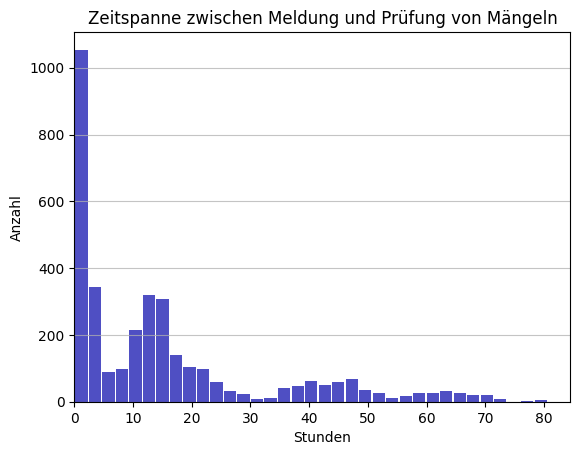

In [99]:

# An "interface" to matplotlib.axes.Axes.hist() method
hour_list = [t / datetime.timedelta(hours=1) for t in df_filtered.timespan_checked]

n, bins, patches = plt.hist(x=hour_list, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Stunden')
plt.ylabel('Anzahl')
plt.title('Zeitspanne zwischen Meldung und Prüfung von Mängeln')
plt.xlim(xmin=0)  # this line
plt.savefig('../plots/timespan_checked.png')
plt.show()

In [66]:
type(hour_list[1])

float